<a href="https://colab.research.google.com/github/vermilion4/GradedQuiz_StageA/blob/master/Copy_of_GradedQuiz_StageA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#reading in the dataset
fuel_data = pd.read_csv('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv')
fuel_data.head()
#fuel_data.shape

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


# Question 1

In [ ]:
#defined list A and B
A = [1,2,3,4,5,6]
B = [13,21,34]
 
#extend A with B
A.extend(B)
A_B = A
print(A_B)

[1, 2, 3, 4, 5, 6, 13, 21, 34]


# Question 2

In [ ]:
#prints identity matrix
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

# Question 3

In [ ]:
#group by fuel type and print out mean of fuel cost per unit burned for each fuel type, put into variable 'data'
data = fuel_data.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean()

#print out the smallest mean and the fuel type attached to it
data.nsmallest(n=1)

fuel_type_code_pudl
gas    13.659397
Name: fuel_cost_per_unit_burned, dtype: float64

# Question 4

In [ ]:
#descriptive statistics rounded to 2 decimal places of fuel_mmbtu_per_unit
fuel_data['fuel_mmbtu_per_unit'].describe().round(2)

count    29523.00
mean         8.49
std         10.60
min          0.00
25%          1.02
50%          5.76
75%         17.01
max        341.26
Name: fuel_mmbtu_per_unit, dtype: float64

# Question 5

In [ ]:
#Skew and Kurt
fuel_data['fuel_qty_burned'].agg(['skew','kurt']).round(2)

skew     15.85
kurt    651.37
Name: fuel_qty_burned, dtype: float64

# Question 6

In [ ]:
#total null values
fuel_data.isnull().sum()
#number of rows
fuel_data.count()
#shape(row,col)
fuel_data.shape

(29523, 11)

In [ ]:
#Feature with missing values
miss = fuel_data.columns[fuel_data.isnull().any()]
val = str(miss.values)

#total
total = fuel_data.isnull().values.sum()

#Percent
percent = ((total/29523)*100).round(3)
print('Feature: ',val)
print('Total: ',total)
print('Percent: ',percent,'%')

Feature:  ['fuel_unit']
Total:  180
Percent:  0.61 %


# Question 7

In [ ]:
#datatypes of the columns in the fuel_data dataset
fuel_data.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

In [ ]:
#data contained in column 'fuel_unit'
fuel_data['fuel_unit']

0        ton
1        ton
2        ton
3        ton
4        mcf
        ... 
29518    mcf
29519    mcf
29520    mcf
29521    ton
29522    mcf
Name: fuel_unit, Length: 29523, dtype: object

# Question 8

In [ ]:
#In order, values and the columns they represent with the 3 lowest correlations with 'fuel_cost_per_unit_burned'
fuel_data[fuel_data.columns[1:]].corr()['fuel_cost_per_unit_burned'][:-1].nsmallest(3)


utility_id_ferc1      -0.037863
fuel_qty_burned       -0.018535
fuel_mmbtu_per_unit   -0.010034
Name: fuel_cost_per_unit_burned, dtype: float64

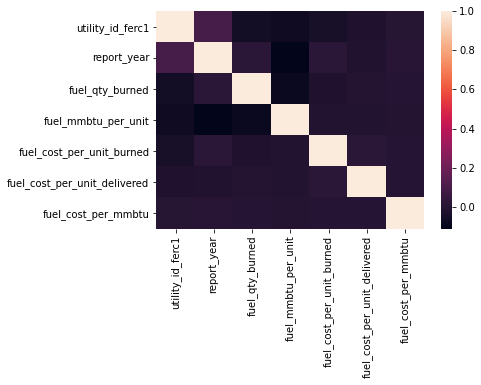

In [ ]:
#heatmap showing correlation
sns.heatmap(fuel_data.corr())

# Question 9

In [ ]:
#Average fuel cost per unit burned for fuel type coal in 1998
data = fuel_data[(fuel_data['report_year']==1998) & (fuel_data['fuel_type_code_pudl']=='coal')]
data_98 = data['fuel_cost_per_unit_burned'].sum()
 
#Average fuel cost per unit burned for fuel type coal in 1994
data2 = fuel_data[(fuel_data['report_year']==1994) & (fuel_data['fuel_type_code_pudl']=='coal')]
data_94 = data2['fuel_cost_per_unit_burned'].sum()
 
#percent change in the averages
diff = ((data_98 - data_94)/data_98)*100
print(int(diff),'%')

-25 %


# Question 10

In [ ]:
#gets the average fuel cost per unit delivered per year group
highest_avg = fuel_data.groupby('report_year')['fuel_cost_per_unit_delivered'].mean()
#prints the largest average
highest_avg.nlargest(n=1)

report_year
1997    11140.197239
Name: fuel_cost_per_unit_delivered, dtype: float64